# Regression of home prizes in Ames, Iowa from home features
The goal is to come up with a predictive model for prices of homes in Ames based on the features of the homes. The data can be downloaded from 

https://raw.githubusercontent.com/kirenz/datasets/master/ames.csv

Data consists of both Categorical and Numerical Entries. We will only use the numerical entries for prediction. You may (in the future) convert the categorical entries to numerical ones to improve prediction accuracy. 

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd


### Download the data
1. Drop rows with NAN entries
2. Scale the features
3. Add a constant feature; home prices often has a baseline. This can be omitted for the extra-credit part with mean subtraction


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/ames.csv")
data.head(10)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899
5,Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,6,2010,WD,Normal,195500,-93.638925,42.060779
6,One_Story_PUD_1946_and_Newer,Residential_Low_Density,41,4920,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,213500,-93.633792,42.062978
7,One_Story_PUD_1946_and_Newer,Residential_Low_Density,43,5005,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,1,2010,WD,Normal,191500,-93.633826,42.060728
8,One_Story_PUD_1946_and_Newer,Residential_Low_Density,39,5389,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,3,2010,WD,Normal,236500,-93.632852,42.061120
9,Two_Story_1946_and_Newer,Residential_Low_Density,60,7500,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,6,2010,WD,Normal,189000,-93.639068,42.059193


## Preprocessing the data

Remove any NAN entries, extract the target field, and scale the data

In [3]:
# Keep only the numerical fields for convenience. Omit categorical fields
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]

# Drop training vectors with NAN entries
data.dropna(axis=0, how='any',inplace=True)

# Extract the target field
y = data['Sale_Price'].to_numpy()

# Remove the target and ID fields from X
datanew = data.drop(['Sale_Price'],axis=1)
X = datanew.to_numpy()
# Scale the data to make their variance one
X = scale(X,with_mean=False)

# Add a constant column to the features to account for baseline
n,m = X.shape
X0 = np.ones((n,1))
X = np.hstack((X,X0))

# Verify that sale price is eliminated
print('Size of Pre-processed data',X.shape)
datanew.head(3)

Size of Pre-processed data (2930, 35)


,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,62,0,0,0,0,0,5,2010,-93.619754,42.054035
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,120,0,0,6,2010,-93.619756,42.053014
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,36,0,0,0,0,12500,6,2010,-93.619387,42.052659


# Visualizing the data

We will load the variables to the matrix $\mathbf X$ and the prices to the vector $y$. We will seek to express the price vector $y$ as a weighted linear combination of the variables denoted by the columns of $\mathbf X$

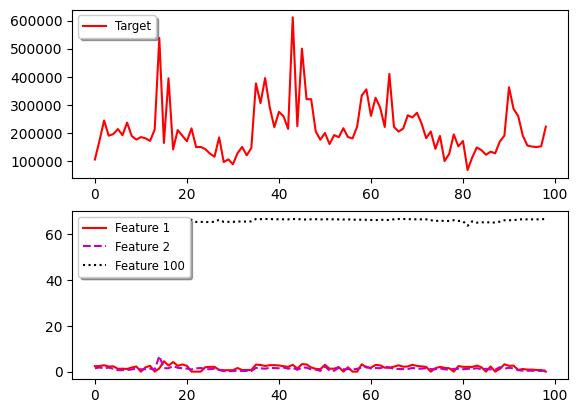

In [4]:
fig, ax = plt.subplots(2, 1)
c=ax[0].plot(y[1:100],'r',label='Target')
l = ax[0].legend(loc='upper left', shadow=True, fontsize='small')

c=ax[1].plot(X[1:100,0],'r',label='Feature 1')
c=ax[1].plot(X[1:100,1],'m--',label='Feature 2')
c=ax[1].plot(X[1:100,2],'k:',label='Feature 100')
legend = ax[1].legend(loc='upper left', shadow=True, fontsize='small')




## Split into training and validation datasets

Training dataset size (2197,)
Test dataset size (733,)


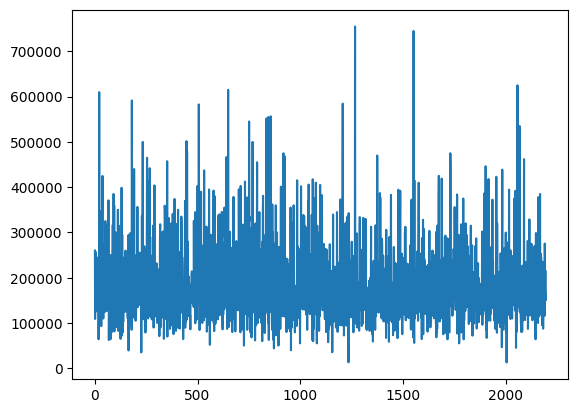

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=32)
print('Training dataset size',y_train.shape)
print('Test dataset size',y_test.shape)

s=plt.plot(y_train)


## 1.(a) <font color = red> Ridge Regression of home prices </font>

We assume that the home prices (y) can be predicted as

$$y = a_0 x_0 + \ldots a_{9} x_{9}+.., $$

where $a_1,..a_{9},..$ are the coefficients and $x_0 .. x_9 ..$ are the home features. Specifically, we are trying to express the category vector as the weighted linear combination of the other curves. The weights are the factors. 

We first create the matrix X_train, whose columns are the normalized training features. We will solve for a using ridge regression as 

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_2^2$$


Text(0.5, 1.0, 'Predicted Coefficients')

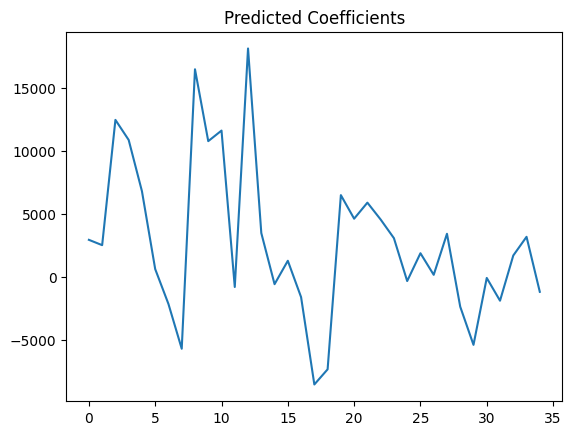

In [6]:
# Implement Ridge Regression manually to find the coefficients 'a'
# Choose an arbitrary regularization parameter alpha
alpha = 1.0

# Calculate the Ridge Regression coefficients 'a' using the closed-form equation
XTX = np.dot(X.T, X)
XTX_alpha_I = XTX + alpha * np.identity(X.shape[1])
XTX_alpha_I_inv = np.linalg.inv(XTX_alpha_I)
XTy = np.dot(X.T, y)
coefficients = np.dot(XTX_alpha_I_inv, XTy)
# Plot the coefficients
plt.plot(coefficients)
plt.title('Predicted Coefficients')

## 1.(a) Prediction

Perform prediction and compare to the actual prices

Text(0.5, 1.0, 'Predicted and Actual labels')

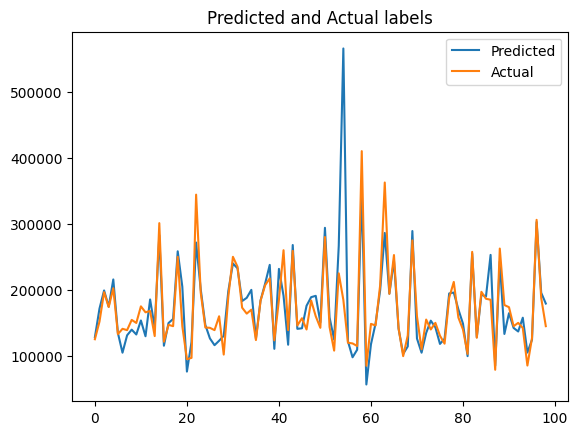

In [7]:
# MODIFY CODE BELOW
# perform a prediction using the coefficients 'a' and the test data
prediction = np.dot(X_test, coefficients)

fig = plt.figure()
plt.plot(prediction[1:100], label='Predicted')
plt.plot(y_test[1:100], label='Actual')
plt.legend()
plt.title('Predicted and Actual labels')

## 1.(b).<font color = red> Regularization parameter selection; ridge regression using scikit learn </font>

We will now determinee the best regularization parameter, which would hopefully reduce the overfitting issue. We will now use ridge regression from Scikit learn for this purpose. See https://scikit-learn.org/stable/ for documentation. This function also solves

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_2^2$$

as with 1.(a).

 We will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). Note that with $\lambda>0$, the coefficient values will be pushed closer to zero.

The plot of coefficients vs alpha will show when each of the coeffients become zero. Similarly, we can also observe the trend of the training and validation error

C:\Users\Adnane Ezouhri\AppData\Local\Temp\ipykernel_12184\858206010.py:43: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coefs[:][4],use_line_collection=True)


Text(0.5, 1.0, 'Ridge Regression Coefficients')

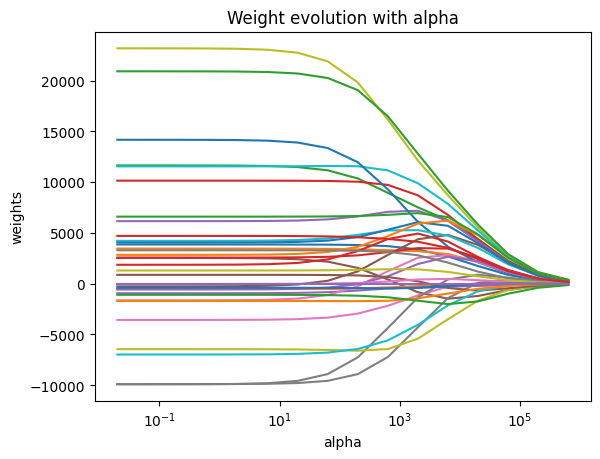

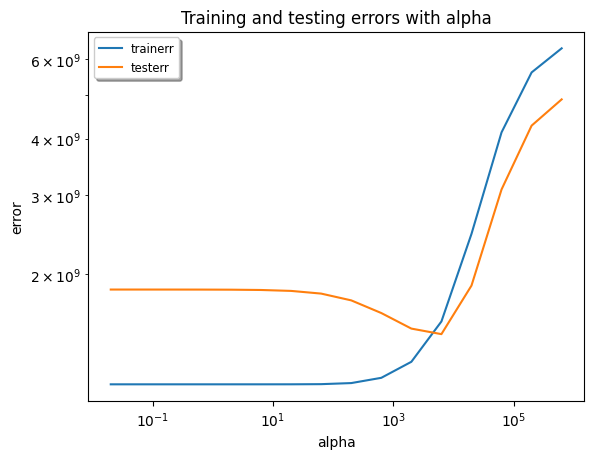

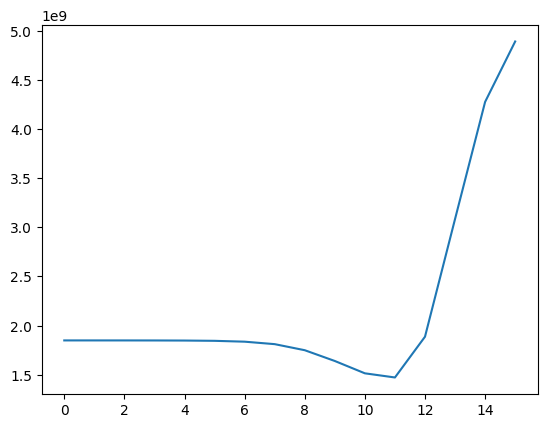

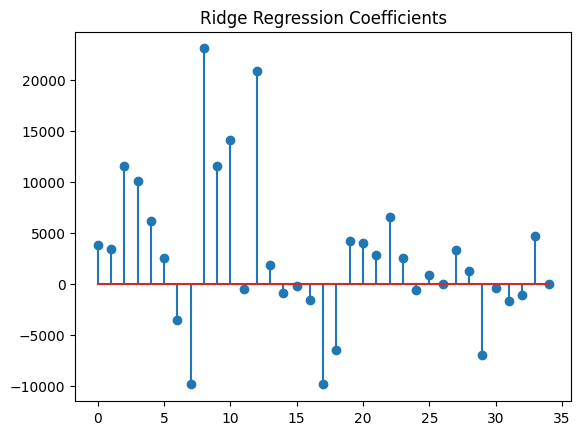

In [8]:
from sklearn.linear_model import Ridge
alphas = 10**np.arange(-2,6,0.5)
ridge = Ridge(max_iter = 10000)

coefs = []
testerr = []
trainerr = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    testerr.append(mean_squared_error(y_test, ridge.predict(X_test)))
    trainerr.append(mean_squared_error(y_train, ridge.predict(X_train)))

fig1 = plt.figure()
ax = fig1.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Weight evolution with alpha')

fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(alphas*2, trainerr,label='trainerr')
ax2.plot(alphas*2, testerr,label='testerr')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('error')
legend = ax2.legend(loc='upper left', shadow=True, fontsize='small')
plt.title('Training and testing errors with alpha')


fig3 = plt.figure()
plt.plot(testerr)

# Plot the minimum point in the testing error
fig4 = plt.figure()
plt.stem(coefs[:][4],use_line_collection=True)
plt.title('Ridge Regression Coefficients')

## 1.b Pick important predictors; pick coefficients greater than a threshold
We will now list the important indices. We choose a threshold of 1000 in this case. You may play with this number. Put your money on these attributes. Likewise, we will insignificant coefficients are the less than a threshold

In [9]:
min_validation_error_index = 4
coeffsnew = coefs[min_validation_error_index][0:-1]

indices = np.nonzero(np.abs(coeffsnew)>1000)
names = datanew.columns
print('Significant Indices',names[indices])

indices = np.nonzero(np.abs(coeffsnew)<=1000)
names = datanew.columns
print('In Significant Indices',names[indices])

Significant Indices Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
       'Bsmt_Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area',
       'Wood_Deck_SF', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Year_Sold',
       'Longitude', 'Latitude'],
      dtype='object')
In Significant Indices Index(['Low_Qual_Fin_SF', 'Bsmt_Half_Bath', 'Full_Bath', 'Open_Porch_SF',
       'Enclosed_Porch', 'Three_season_porch', 'Mo_Sold'],
      dtype='object')


## <font color = red> 1.c. To do: Lasso regression</font>

You will now use lasso regression from Scikit learn to regularize the estimation, which is another regularization strategy. See details in the course notes and documentation on  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 Here, the cost function is specified by 

$$\mathbf a = \arg \min_{\mathbf a}\|\mathbf X\mathbf a - \mathbf y\|^2 + \alpha \|\mathbf a\|_{\ell_1}$$

Similar to the ridge regression setting, you will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). The plot of coefficients vs alpha will show when the coeffients become zero. Similarly, we can also observe the trend of the training and validation error.

We will store the coefficients, test error, and training error for a range of regularization parameters (denoted by alpha). Note that with $\lambda>0$, the coefficient values will be pushed closer to zero.

The plot of coefficients vs alpha will show when each of the coeffients become zero. Similarly, we can also observe the trend of the training and validation error

Significant Indices Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude',
       'Latitude'],
      dtype='object')


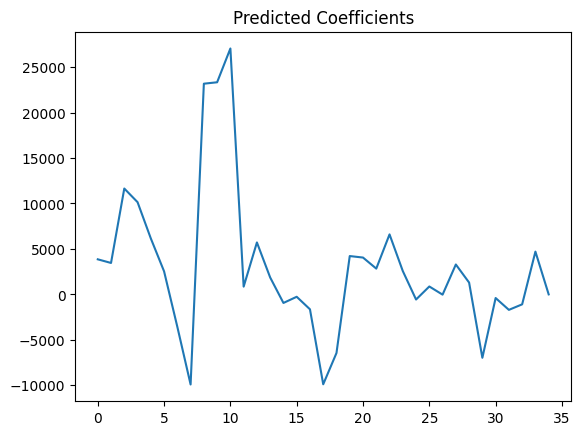

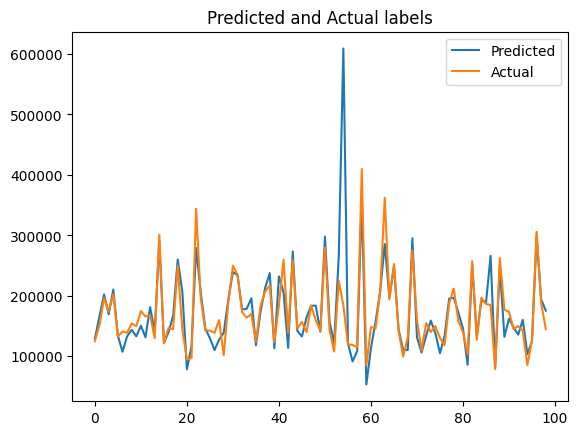

In [10]:
# YOUR CODE HERE
# Set the regularization parameter
alpha = 0.1

# Create a Lasso regression object
lasso = Lasso(alpha=alpha)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Make predictions on the test data
prediction = lasso.predict(X_test)

# Plot the coefficients
plt.plot(coefficients)
plt.title('Predicted Coefficients')

# Plot the predictions and the actual values
plt.figure()
plt.plot(prediction[1:100], label='Predicted')
plt.plot(y_test[1:100], label='Actual')
plt.legend()
plt.title('Predicted and Actual labels')

# Print the important predictors
indices = np.nonzero(coefficients)
names = datanew.columns
print('Significant Indices',names[indices])

## 1.c Pick important predictors; pick coefficients greater than a threshold
Note that the coeffients are sparse. We will now list the important indices. We choose a threshold of 1000 in this case. You may play with this number. Put your money on these attributes

In [11]:
# YOUR CODE HERE

# Set the threshold
threshold = 1000

# Find the indices of the coefficients that are greater than the threshold
important_indices = np.nonzero(np.abs(coefficients) > threshold)

# Print the names of the important predictors
important_predictors = names[important_indices]
print('Important Predictors:', important_predictors)

Important Predictors: Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
       'Bsmt_Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area',
       'Wood_Deck_SF', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Year_Sold',
       'Longitude', 'Latitude'],
      dtype='object')
